In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
settings = {"units": "imperial", "appid": api_key}

cities_weatherpy =pd.DataFrame(columns = ["City","Cloudiness", "Country", "Date", 
                                          "Humidity", "Lat","Lng", "Max Temp", "Wind Speed"])

# Create counters
count = 1 
err = 0 
sets = 0 
index = 0 


t0 =time.time()

print(f'Beginning Data Retrieval \n ........................')

for city in cities:
    
    try:
        city1 = city.replace(" ", "%20") 
        print(f'Processing Record {count} of Set {sets} | {city}' )

        city_stats = owm.get_current(city, **settings)
        cities_weatherpy.set_value(index, "City", city_stats["name"])
        cities_weatherpy.set_value(index, "Cloudiness", city_stats("clouds.all"))
        cities_weatherpy.set_value(index, "Country", city_stats("sys.country"))
        cities_weatherpy.set_value(index, "Date", city_stats("dt"))
        cities_weatherpy.set_value(index, "Max Temp", city_stats("main.temp_max"))
        cities_weatherpy.set_value(index, "Wind Speed", city_stats("wind.speed"))
        cities_weatherpy.set_value(index, "Lat", city_stats("coord.lat"))
        cities_weatherpy.set_value(index, "Lng", city_stats("coord.lon"))
        cities_weatherpy.set_value(index, "Humidity", city_stats("main.humidity"))
        
        index = index +1 
    except Exception as e:
        print('City not found. Skipping...')
        
        err= err+1
    count = count+1
    
    if count == 51: 
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("........................\n End of Data Retrieval \n ........................")


Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | kodiak
Processing Record 2 of Set 0 | hermanus


C:\Users\Irisi\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Irisi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Irisi\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Irisi\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Irisi\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Irisi\Anaconda3\lib\s

Processing Record 3 of Set 0 | higuey
City not found. Skipping...
Processing Record 4 of Set 0 | morondava
Processing Record 5 of Set 0 | busselton
Processing Record 6 of Set 0 | rikitea
Processing Record 7 of Set 0 | bluff
Processing Record 8 of Set 0 | bethanien
Processing Record 9 of Set 0 | la macarena
Processing Record 10 of Set 0 | albany
Processing Record 11 of Set 0 | garowe
Processing Record 12 of Set 0 | ushuaia
Processing Record 13 of Set 0 | port alfred
Processing Record 14 of Set 0 | butaritari
Processing Record 15 of Set 0 | castro
Processing Record 16 of Set 0 | kununurra
Processing Record 17 of Set 0 | tura
Processing Record 18 of Set 0 | punta arenas
Processing Record 19 of Set 0 | atuona
Processing Record 20 of Set 0 | bhag
Processing Record 21 of Set 0 | khatanga
Processing Record 22 of Set 0 | bambous virieux
Processing Record 23 of Set 0 | gravdal
Processing Record 24 of Set 0 | avarua
Processing Record 25 of Set 0 | pocatello
Processing Record 26 of Set 0 | tuatap

Processing Record 41 of Set 3 | toul
Processing Record 42 of Set 3 | airai
Processing Record 43 of Set 3 | pauini
Processing Record 44 of Set 3 | dongning
Processing Record 45 of Set 3 | hithadhoo
Processing Record 46 of Set 3 | upata
Processing Record 47 of Set 3 | kalach-na-donu
Processing Record 48 of Set 3 | kralendijk
Processing Record 49 of Set 3 | saint-joseph
Processing Record 50 of Set 3 | alice springs
Processing Record 1 of Set 4 | karakose
City not found. Skipping...
Processing Record 2 of Set 4 | inuvik
Processing Record 3 of Set 4 | gladstone
Processing Record 4 of Set 4 | yumen
Processing Record 5 of Set 4 | narasannapeta
Processing Record 6 of Set 4 | rockport
Processing Record 7 of Set 4 | newport
Processing Record 8 of Set 4 | santa isabel do rio negro
Processing Record 9 of Set 4 | nome
Processing Record 10 of Set 4 | chokurdakh
Processing Record 11 of Set 4 | bubaque
Processing Record 12 of Set 4 | awjilah
Processing Record 13 of Set 4 | souillac
Processing Record 1

Processing Record 31 of Set 7 | viedma
Processing Record 32 of Set 7 | makaryev
Processing Record 33 of Set 7 | presidente medici
Processing Record 34 of Set 7 | asau
Processing Record 35 of Set 7 | labutta
City not found. Skipping...
Processing Record 36 of Set 7 | pleasanton
Processing Record 37 of Set 7 | pokrovsk
Processing Record 38 of Set 7 | saint-francois
Processing Record 39 of Set 7 | dolbeau
City not found. Skipping...
Processing Record 40 of Set 7 | pafos
Processing Record 41 of Set 7 | labuhan
Processing Record 42 of Set 7 | campina grande do sul
Processing Record 43 of Set 7 | caravelas
Processing Record 44 of Set 7 | vaitape
Processing Record 45 of Set 7 | bagn
Processing Record 46 of Set 7 | beringovskiy
Processing Record 47 of Set 7 | qaqortoq
Processing Record 48 of Set 7 | diplo
Processing Record 49 of Set 7 | humboldt
Processing Record 50 of Set 7 | casino
Processing Record 1 of Set 8 | helong
Processing Record 2 of Set 8 | kismayo
Processing Record 3 of Set 8 | itu

Processing Record 16 of Set 11 | brus laguna
Processing Record 17 of Set 11 | marion
Processing Record 18 of Set 11 | yarada
Processing Record 19 of Set 11 | porto tolle
Processing Record 20 of Set 11 | antofagasta
Processing Record 21 of Set 11 | buritis
Processing Record 22 of Set 11 | tumannyy
City not found. Skipping...
Processing Record 23 of Set 11 | amderma
City not found. Skipping...
Processing Record 24 of Set 11 | chernyshevskiy
Processing Record 25 of Set 11 | esparta
Processing Record 26 of Set 11 | opuwo
Processing Record 27 of Set 11 | te anau
Processing Record 28 of Set 11 | florianopolis
Processing Record 29 of Set 11 | nelson bay
Processing Record 30 of Set 11 | prince rupert
Processing Record 31 of Set 11 | new bedford
Processing Record 32 of Set 11 | kosh-agach
Processing Record 33 of Set 11 | buala
Processing Record 34 of Set 11 | kiruna
Processing Record 35 of Set 11 | moerai
Processing Record 36 of Set 11 | olafsvik
Processing Record 37 of Set 11 | pangody
Process

In [5]:
# Convert Raw Data to DataFrame
cities_weatherpy.to_csv("cities.csv", encoding="utf-8", index=False)

In [6]:
# Get info and show record of Count
cities_weatherpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 569
Data columns (total 9 columns):
City          570 non-null object
Cloudiness    570 non-null object
Country       570 non-null object
Date          570 non-null object
Humidity      570 non-null object
Lat           570 non-null object
Lng           570 non-null object
Max Temp      570 non-null object
Wind Speed    570 non-null object
dtypes: object(9)
memory usage: 64.5+ KB


In [7]:
# Display the DataFrame
cities_weatherpy.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Paul Harbor,1,US,1586208081,34,57.79,-152.41,35.6,16.11
1,Hermanus,16,ZA,1586208082,71,-34.42,19.23,55.99,5.99
2,Morondava,11,MG,1586208082,82,-20.28,44.28,77.16,2.55
3,Busselton,0,AU,1586207934,39,-33.65,115.33,64,16.44
4,Rikitea,62,PF,1586208082,63,-23.12,-134.97,76.12,5.21
5,Bluff,82,NZ,1586208082,96,-46.6,168.33,53.01,1.99
6,Bethanien,76,NA,1586208082,41,-26.5,17.16,59.61,9.62
7,La Macarena,100,CO,1586208082,87,2.18,-73.78,75.63,1.68
8,Albany,20,US,1586208082,18,42.6,-73.97,62.01,17.22
9,Garoowe,0,SO,1586208082,59,8.41,48.48,76.59,14.12


### Plotting the Data

#### Latitude vs. Temperature Plot

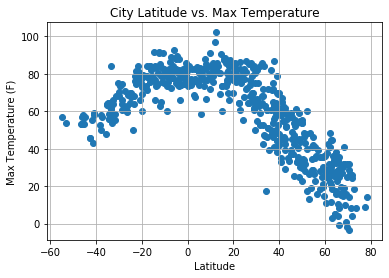

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(cities_weatherpy["Lat"], cities_weatherpy["Max Temp"], marker="o")


plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/TemperatureInWeatherPy.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

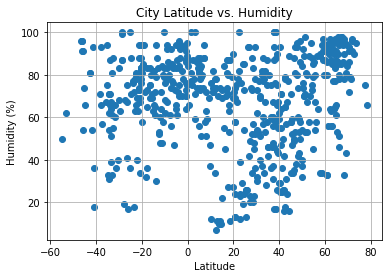

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(cities_weatherpy["Lat"], cities_weatherpy["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/HumidityInWeatherPy.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

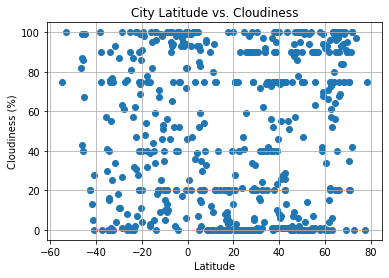

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(cities_weatherpy["Lat"], cities_weatherpy["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CloudinessInWeatherPy.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

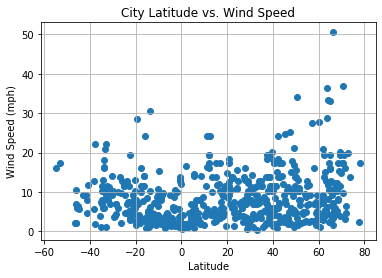

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(cities_weatherpy["Lat"], cities_weatherpy["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/WindSpeedInWeatherPy.png")

# Show plot
plt.show()

# WeatherPy
----

### Analysis

From the ‘City Latitude vs. Max Temperature’ plot we can observe that the closure to the equator the higher the temperatures are. Also, the further from the equator the colder it gets.
From the ‘City Latitude vs. Humidity’ and the ‘City Latitude vs. Cloudiness’ plot we do not see a significant correlation of humidity and cloudiness with altitude.